In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk 
import string
import re
from contractions import CONTRACTIONS_DICT 
from Convert_Negation import CONVERT_NEGATION
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.metrics import classification_report
import re

[nltk_data] Downloading package stopwords to C:\Users\Gloria
[nltk_data]     Hutauruk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
dataset_review = pd.read_excel('E:/_KEPERLUAN FINAL TA/TASI-14_REVISI_FIKS/data_review/Data_model_sentimen.xlsx')

dataset_review.head(10)


,Review,Rating,Sentimen,Label
0,"The Keto Diet, by Leanne Vogel, was my first k...",3,Positif,1
1,To many ingredients unless it’s a holiday.,2,Negatif,0
2,"Information is there, meal plans exceed the re...",3,Negatif,0
3,Simple not too many recipes but does the trick,3,Negatif,0
4,Hope you like cream cheese,3,Positif,1
5,Like the recipes. But would have liked single ...,2,Negatif,0
6,Easy and informative. Great recipes. The food ...,1,Positif,1
7,didn't finish reading. too complicate a food p...,3,Positif,1
8,Can't endorse this diet. Too much fat and food...,3,Positif,1
9,Redundant. The author clearly told how she los...,1,Positif,1


In [4]:
len(dataset_review)

5244

In [5]:
pos = len([x for x in dataset_review['Sentimen'] if x == 'Positif'])
neg = len([x for x in dataset_review['Sentimen'] if x == 'Negatif'])

pos,neg

(2743, 2501)

In [6]:
def NER(review):
    for i in range(len(review)):
        text = review.Review.iloc[i]
        for sent in nltk.sent_tokenize(text):
            for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
                if hasattr(chunk, 'label') and chunk.label:
                    if chunk.label() == 'ORGANIZATION' or  chunk.label() == 'PERSON' or  chunk.label() == 'DATE' or  chunk.label() == 'LOCATION':
                        name_value = ' '.join(child[0] for child in chunk.leaves())
                        text = text.replace(name_value, "")
                        review.Review.iloc[i] = text
    return review

In [7]:
def case_folding(review):
    for i in range(len(review)):
        text = review.Review[i].lower()
        review.Review.iloc[i] = text 
    return review

In [8]:
def expand_contraction(review):
    contractions_re = re.compile('(%s)' % '|'.join(CONTRACTIONS_DICT.keys()))
    d = {}
    index=0
    for i in review.Review:
        text = i
        def replace(match):
            return CONTRACTIONS_DICT[match.group(0)]
        text = contractions_re.sub(replace, text)
        #review = review.replace(text,"")
        review.Review[index] = text
        index+=1
    return review

In [9]:
def convert_negation(review):
    convertNegation_re = re.compile('(%s)' % '|'.join(CONVERT_NEGATION.keys()))
    d = {}
    index=0
    for i in review.Review:
        text = i
        def replace(match):
            return CONVERT_NEGATION[match.group(0)]
        text = convertNegation_re.sub(replace, text)
        review.Review[index] = text
        index+=1
    return review

In [10]:
def remove_punctuation(review):
    remove = string.punctuation
    for i in range(len(review)):
        for kata in remove:
            text = review.Review[i].replace(kata,"")
            review.Review.iloc[i] = text 
    return review

In [11]:
def stop_removal(review):
    from nltk.tokenize import sent_tokenize, word_tokenize
    cachedStopWords = set(stopwords.words("english"))
    for i in range(len(review)):
        text = review.Review.iloc[i]
        teks =" ".join([word for word in text.split() if word not in cachedStopWords])
        review.Review.iloc[i] = teks
    return review

In [12]:
def stemming(review):
    ps = PorterStemmer()
    for i in range(len(review)):
        text = review.Review.iloc[i]
        text = ps.stem(text)
        review.Review.iloc[i] = text
    return review

In [13]:
def lemmatization (review):
    lm = WordNetLemmatizer()
    for i in range(len(review)):
        text = review.Review.iloc[i]
        text = lm.lemmatize(text)
        review.Review.iloc[i] = text
    return review

In [14]:
def preprocessing_data(review):
    hasil_ner = NER(review)
    hasil_case_folding = case_folding(hasil_ner)
    hasil_convert_negation = convert_negation(hasil_case_folding)
    hasil_expand = expand_contraction(hasil_convert_negation)
    hasil_remove_punctuation = remove_punctuation(hasil_expand)
    hasil_stop_removal = stop_removal(hasil_remove_punctuation)
    hasil_stemming = stemming( hasil_stop_removal)
    hasil_lemmatization = lemmatization(hasil_stemming)
    return hasil_lemmatization
    

In [15]:
data_clean = preprocessing_data(dataset_review)

C:\Users\Gloria Hutauruk\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Gloria Hutauruk\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Gloria Hutauruk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
import re

pattern=r'[^a-zA-Z]'

for i in range(len(data_clean)):
    data_clean['Review'].iloc[i] = re.sub(pattern,' ', data_clean['Review'].iloc[i], flags=re.MULTILINE)
data_clean.head(10)

C:\Users\Gloria Hutauruk\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Review,Rating,Sentimen,Label
0,first keto book book use daily basis grown ket...,3,Positif,1
1,many ingredients unless it s holiday,2,Negatif,0
2,information meal plans exceed recommended max ...,3,Negatif,0
3,simple many recipes trick,3,Negatif,0
4,hope like cream chees,3,Positif,1
5,like recipes would liked single portion measur,2,Negatif,0
6,easy informative great recipes food choices go...,1,Positif,1
7,finish reading complicate food plan,3,Positif,1
8,cannot endorse diet much fat food restrictions...,3,Positif,1
9,redundant author clearly told lost pounds ...,1,Positif,1


In [17]:
y = data_clean.Sentimen

In [31]:
data_clean.Review

0       first keto book book use daily basis grown ket...
1                    many ingredients unless it s holiday
2       information meal plans exceed recommended max ...
3                               simple many recipes trick
4                                   hope like cream chees
5          like recipes would liked single portion measur
6       easy informative great recipes food choices go...
7                     finish reading complicate food plan
8       cannot endorse diet much fat food restrictions...
9       redundant author clearly told lost     pounds ...
10                                               interest
11       different keto essentials even lots recipes look
12      never used recipes I feel like food researched...
13      books definitely used I read cannot get invest...
14      maybe set expectations high book anticlimactic...
15      favorite book spoiler alert ends abruptly read...
16      found book mundane many pages plot little unbe...
17      i ve n

In [22]:
hasil_preprocessing= dataset_review.to_excel('datatrain_after_preproced.xlsx', encoding='utf-8')

In [24]:
data_baru = pd.read_excel('E:/_KEPERLUAN FINAL TA/TASI-14_REVISI_FIKS/datatrain_after_preproced.xlsx')


,Review,Rating,Sentimen,Label
0,first keto book book use daily basis grown ket...,3,Positif,1
1,many ingredients unless it s holiday,2,Negatif,0
2,information meal plans exceed recommended max ...,3,Negatif,0
3,simple many recipes trick,3,Negatif,0
4,hope like cream chees,3,Positif,1
5,like recipes would liked single portion measur,2,Negatif,0
6,easy informative great recipes food choices go...,1,Positif,1
7,finish reading complicate food plan,3,Positif,1
8,cannot endorse diet much fat food restrictions...,3,Positif,1
9,redundant author clearly told lost pounds ...,1,Positif,1


In [32]:
data_baru.Review

0       first keto book book use daily basis grown ket...
1                    many ingredients unless it s holiday
2       information meal plans exceed recommended max ...
3                               simple many recipes trick
4                                   hope like cream chees
5          like recipes would liked single portion measur
6       easy informative great recipes food choices go...
7                     finish reading complicate food plan
8       cannot endorse diet much fat food restrictions...
9       redundant author clearly told lost     pounds ...
10                                               interest
11       different keto essentials even lots recipes look
12      never used recipes I feel like food researched...
13      books definitely used I read cannot get invest...
14      maybe set expectations high book anticlimactic...
15      favorite book spoiler alert ends abruptly read...
16      found book mundane many pages plot little unbe...
17      i ve n

### Feature_Extraction

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=1)
X_train_counts = count_vect.fit_transform(data_clean.Review)
print (X_train_counts.shape)
count_vect.vocabulary_

(5244, 7219)


{'inform': 3215,
 'uninteresting': 6746,
 'languages': 3523,
 'twisty': 6655,
 'laughs': 3545,
 'manner': 3806,
 'rushed': 5461,
 'realized': 5102,
 'festivals': 2378,
 'married': 3833,
 'mayer': 3865,
 'poor': 4729,
 'messages': 3935,
 'womans': 7094,
 'extent': 2259,
 'bookjust': 687,
 'pervs': 4588,
 'torn': 6521,
 'listened': 3664,
 'montauge': 4024,
 'rye': 5465,
 'voices': 6915,
 'selfconscious': 5592,
 'try': 6627,
 'overall': 4413,
 'de': 1516,
 'rain': 5035,
 'empowerment': 2027,
 'pseudonym': 4944,
 'weak': 6979,
 'net': 4173,
 'disappointedbut': 1719,
 'tiresome': 6475,
 'teared': 6302,
 'symbolism': 6240,
 'anticlimactic': 274,
 'birdbook': 616,
 'hide': 2948,
 'foreign': 2504,
 'anatomy': 231,
 'alright': 192,
 'hug': 3044,
 'develop': 1651,
 'dismystifying': 1763,
 'youtube': 7204,
 'articl': 348,
 'rang': 5046,
 'shame': 5664,
 'slows': 5806,
 'sincere': 5745,
 'resourceful': 5324,
 'together': 6493,
 'avoided': 437,
 'honeymoon': 2999,
 'not': 4232,
 'sweatshirt': 6229,

In [35]:
import pickle
with open('feature.pkl', 'wb') as f:
    pickle.dump(count_vect, f)
print('saved featured in ', './feature.pkl')

saved featured in  ./feature.pkl


In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print (X_train_tfidf.shape)
print(tfidf_transformer.fit_transform(count_vect.fit_transform(data_clean.Review)).toarray())

(5244, 7219)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [38]:
C = 1.0  # SVM regularization parameter
model_sentimen = SVC(probability=True, kernel='linear', C=C)
model = model_sentimen.fit(X_train_tfidf,y)


In [73]:
from sklearn.model_selection import KFold 
i = 0
kf = KFold(n_splits=10)
for train, test in kf.split(X_train_tfidf):
    X = X_train_tfidf
    y = y
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    model_sentimen = model_sentimen.fit(X_train,y_train)
    print("classification_report", classification_report(model_sentimen.predict(X_test),y_test))
    with open('model_sentimen '+ str(i)+'.pkl ', 'wb') as f:
        pickle.dump(model_sentimen, f)
        print('model_sentimen',i,' saved in', './model.pkl',i)
        i+= 1

classification_report              precision    recall  f1-score   support

    Negatif       0.76      0.75      0.76       255
    Positif       0.77      0.78      0.78       270

avg / total       0.77      0.77      0.77       525

model_sentimen 0  saved in ./model.pkl 0
classification_report              precision    recall  f1-score   support

    Negatif       0.73      0.98      0.84       300
    Positif       0.94      0.52      0.67       225

avg / total       0.82      0.78      0.77       525

model_sentimen 1  saved in ./model.pkl 1
classification_report              precision    recall  f1-score   support

    Negatif       0.70      0.75      0.72       229
    Positif       0.79      0.75      0.77       296

avg / total       0.75      0.75      0.75       525

model_sentimen 2  saved in ./model.pkl 2
classification_report              precision    recall  f1-score   support

    Negatif       0.79      0.75      0.77       284
    Positif       0.73      0.77     

In [41]:
from sklearn.model_selection import KFold 
i = 0
performance_model = []

kf = KFold(n_splits=10)
for train, test in kf.split(X_train_tfidf):
    X = X_train_tfidf
    y = y
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    model_sentimen = model_sentimen.fit(X_train,y_train)
    report = classification_report(model_sentimen.predict(X_test),y_test)
    report = report.split()
    performance_model.append([report[17],report[18],report[19]])
    print(report[17],report[18],report[19])
    

0.77 0.77 0.77
0.82 0.78 0.77
0.75 0.75 0.75
0.76 0.76 0.76
0.85 0.85 0.85
0.78 0.78 0.78
0.68 0.67 0.66
0.72 0.71 0.72
0.70 0.70 0.70
0.69 0.57 0.53


In [42]:
evaluasi_model_sentimen = pd.DataFrame(performance_model)
evaluasi_model_sentimen.columns = ['precision','recall','f1-score']

evaluasi_model_sentimen

,precision,recall,f1-score
0,0.77,0.77,0.77
1,0.82,0.78,0.77
2,0.75,0.75,0.75
3,0.76,0.76,0.76
4,0.85,0.85,0.85
5,0.78,0.78,0.78
6,0.68,0.67,0.66
7,0.72,0.71,0.72
8,0.70,0.70,0.70
9,0.69,0.57,0.53


In [45]:
sumprecision = evaluasi_model_sentimen['precision'].astype(float)
avgprecision = sum(sumprecision)/len(sumprecision)

sumrecall = evaluasi_model_sentimen['recall'].astype(float)
avgrecall = sum(sumrecall)/len(sumrecall)

sumfscore = evaluasi_model_sentimen['f1-score'].astype(float)
avgfscore = sum(sumfscore)/len(sumfscore)

print ('precision', 'recall', 'fscore' )
print (avgprecision, avgrecall, avgfscore )

precision recall fscore
0.752 0.734 0.729


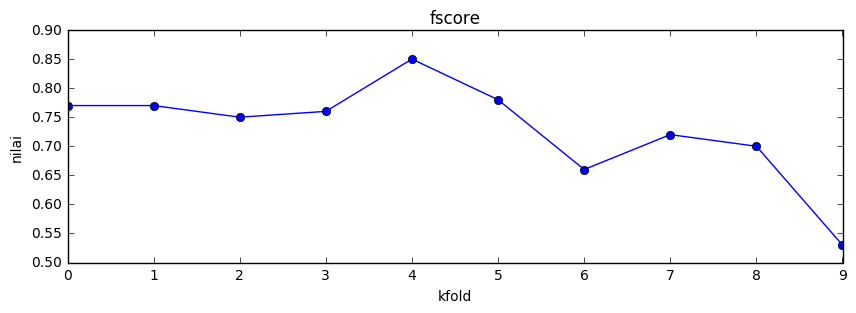

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot( evaluasi_model_sentimen['f1-score'], marker = "o" )
plt.title("fscore")
plt.xlabel("kfold")
plt.ylabel("nilai")


plt.show()

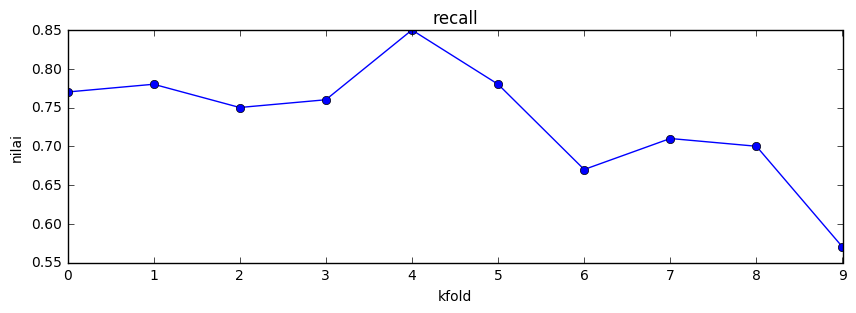

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot( evaluasi_model_sentimen.recall, marker = "o" )

plt.title("recall")
plt.xlabel("kfold")
plt.ylabel("nilai")

plt.show()

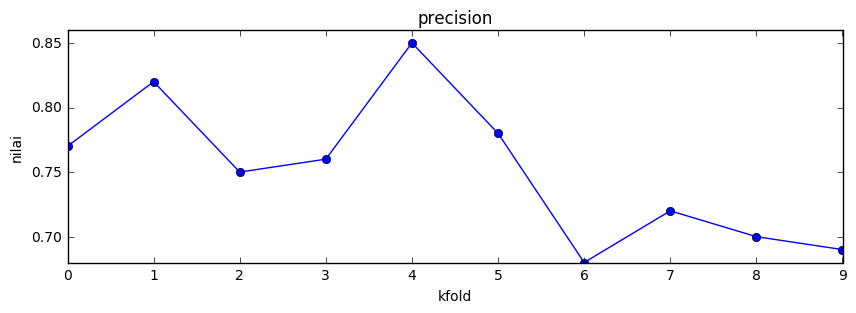

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot( evaluasi_model_sentimen.precision, marker = "o" )

plt.title("precision")
plt.xlabel("kfold")
plt.ylabel("nilai")

plt.show()

In [53]:
 with open('model_sentimen.pkl ', 'wb') as f:
        pickle.dump(model, f)
        print('model_sentimen saved in', './model.pkl',)
       

model_sentimen saved in ./model.pkl
